<center>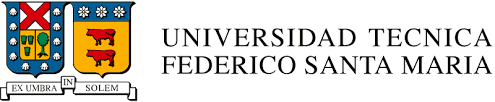</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC

import warnings
warnings.filterwarnings('ignore')

# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"brunomb97","key":"2e756a83a3e444a55fb28109f3d25c8b"}'}

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [ ]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

seoul-bike-sharing-demand-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


Descomprimir

In [ ]:
!unzip seoul-bike-sharing-demand-prediction.zip

Archive:  seoul-bike-sharing-demand-prediction.zip
replace SeoulBikeData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SeoulBikeData.csv       


### 1.1.1 Exploración del conjunto de datos




In [2]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?
>> - **Valores numéricos**: ``Rented Bike Count``, ``Temperature``, ``Humidity``, ``Wind speed`` (velocidad del viento), ``Visibility`` (visibilidad), ``Dew Point Temperature``, ``Solar radiation`` (radiación solar), ``Rainfall``, ``Snowfall``, ``Hour``, ``Date``.
- **Valores categóricos**: ``Seasons``, ``Holiday``, ``Functioning Day``.
* _Nota:_ 
  - ``Dew Point Temperature`` (temperatura de punto de rocío) es la temperatura a la que el aire debe enfriarse para que se produzca la condensación del vapor de agua contenido en él. Es la temperatura a la cual la humedad relativa del aire alcanza el 100%.
  - ``Date`` se considerará como una variable numérica para considerar un posible tratamiento de las subvariables de esta (mes y año) como series de tiempo y como una variable ciclica. Se realiza un debate respecto a que sea considerada como una variable categórica, sin embargo se entiende que de esta se pueden obtener variables númericas.

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?
>> ``Date`` y ``Season`` son variables ciclicas.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.
>> No aparecen valores ``NaN``. Esto se puede verificar realizando un análisis exploratorio con la siguiente función:

In [4]:

def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


> d) **(PREGUNTA ELIMINADA)** ¿Por qué la variable _Functioning Day_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.
>> Inicialmente, se consideró que esta variable no aporta nada ya que, si no está funcionando, simplemente no se rentan bicicletas. Sin embargo, puede servir para pronosticar si no habrán ventas durante ese día.

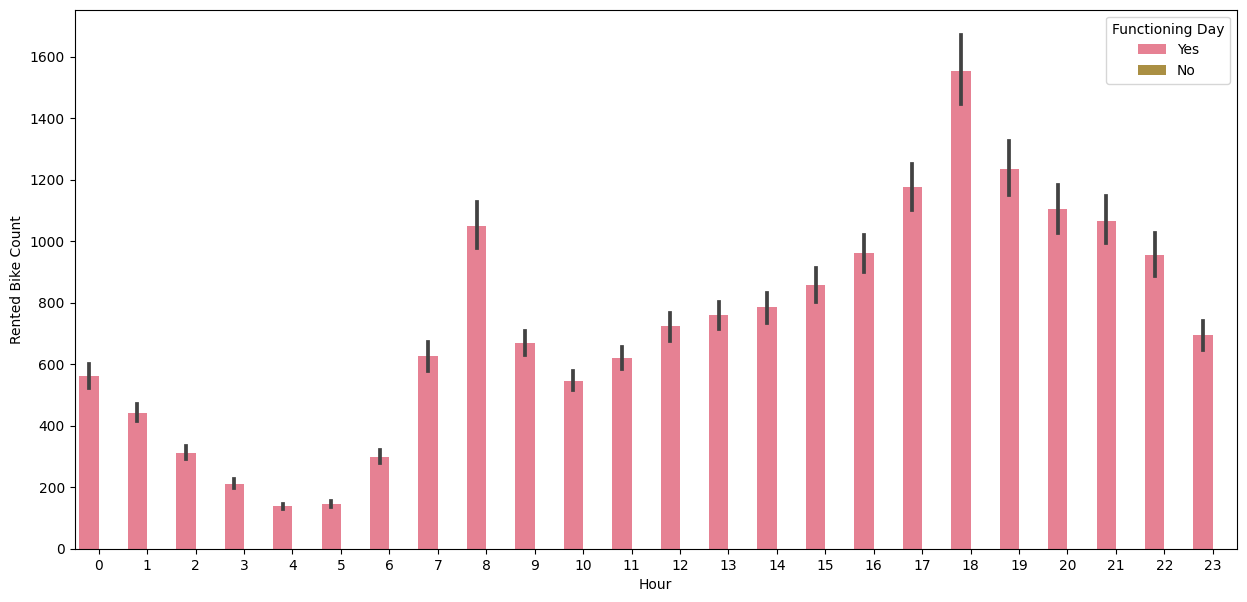

In [5]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [ ]:
#Linea ignorada dada la eliminación de 1.1.1.D
#data.drop('Functioning Day', axis=1, inplace=True) 

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.
>> En primer lugar, exploramos la cantidad de datos que tenemos para cada categoría de cada variable.

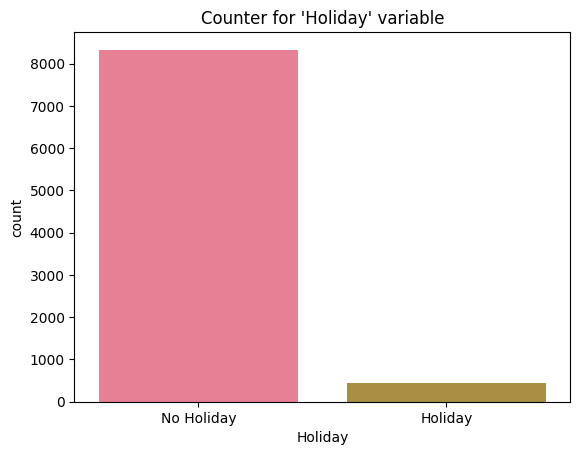

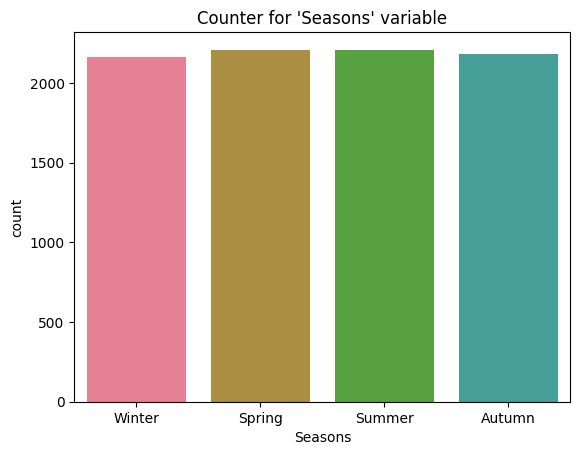

In [6]:
cat_features = data[['Holiday', 'Seasons']]
for i in cat_features:
    ax = sns.countplot(x = data[i])
    plt.title(f'Counter for \'{i}\' variable')
    plt.show()

>> Luego, estudiamos la relación entre las distintas variables respecto al número de bicicletadas rentadas.

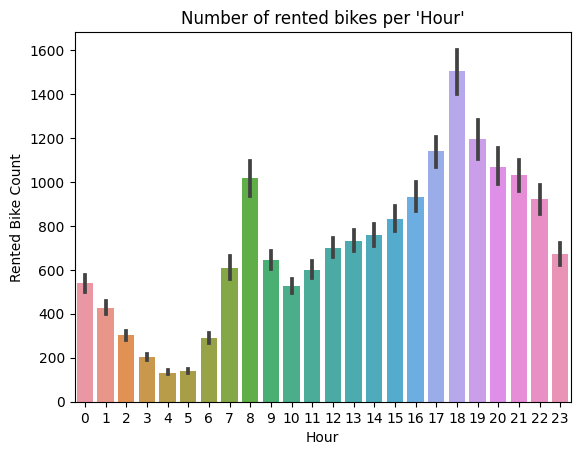

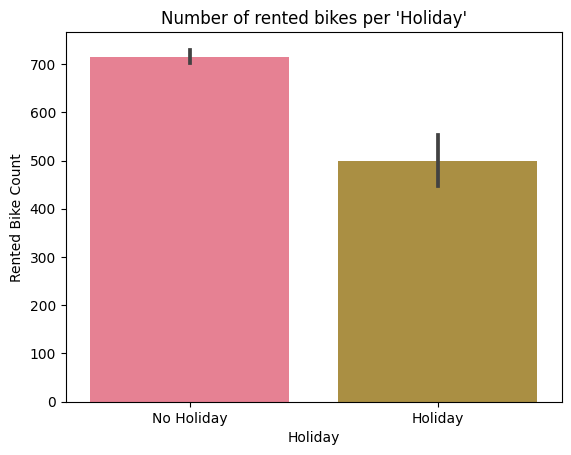

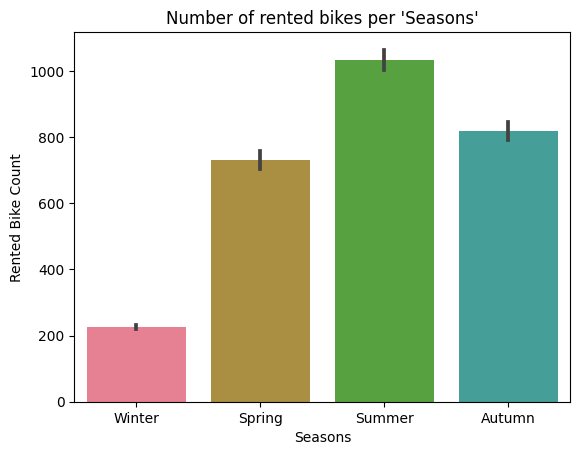

In [7]:
cat_features = data[['Hour', 'Holiday', 'Seasons']]
for i in cat_features:
    ax = sns.barplot(data=data, x=i, y='Rented Bike Count')
    plt.title(f'Number of rented bikes per \'{i}\'')
    plt.show()

>> 'Date' (y 'Weekday')

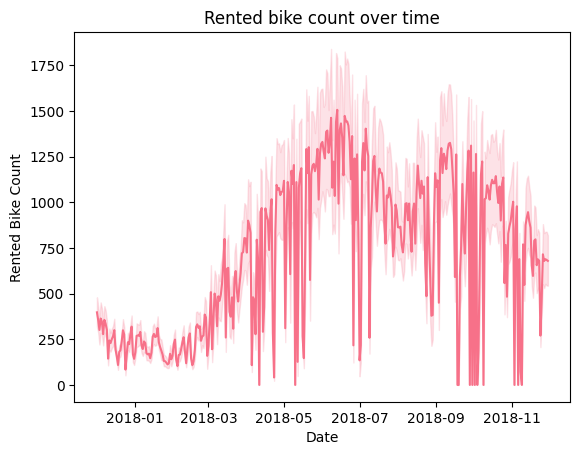

In [8]:
df = data.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
ax = sns.lineplot(data=df, x='Date', y='Rented Bike Count')
plt.title('Rented bike count over time')
plt.show()

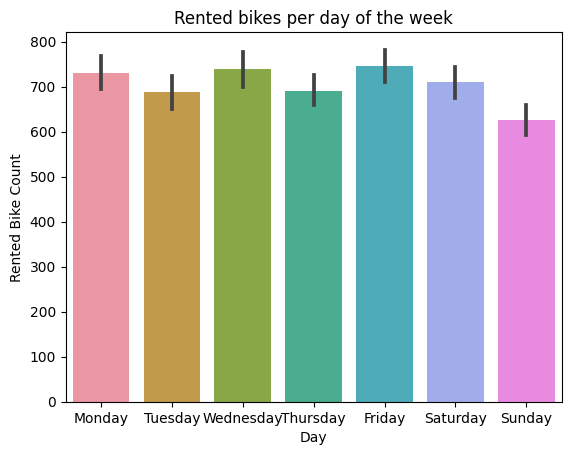

In [9]:
df = data.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day_name()
ax = sns.barplot(data=df, 
                 x='Day', 
                 y='Rented Bike Count', 
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rented bikes per day of the week')
plt.show()

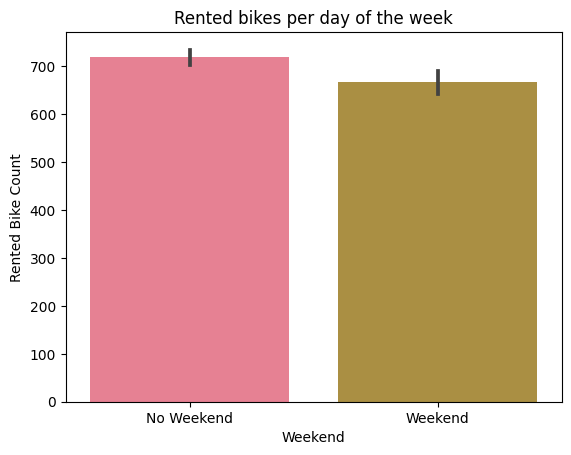

In [10]:
def replace_weekday(day):
  if day == 'Saturday' or day == 'Sunday':
    return 'Weekend'
  else:
    return 'No Weekend'

df['Weekend'] = df['Day'].apply(replace_weekday)
ax = sns.barplot(data=df, 
                 x='Weekend', 
                 y='Rented Bike Count', 
                 order = ['No Weekend', 'Weekend'])
plt.title('Rented bikes per day of the week')
plt.show()

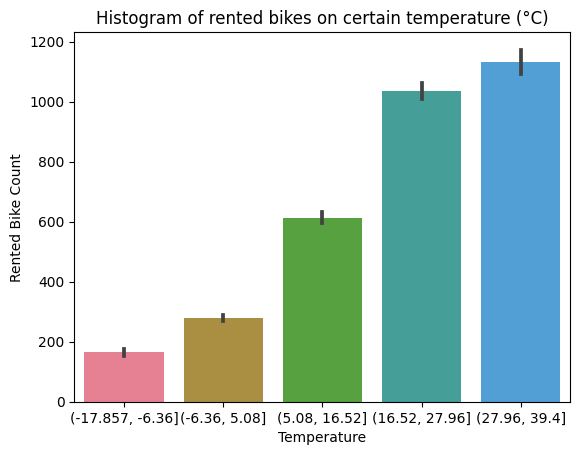

In [11]:
df = data.copy()
df['Temperature'] = pd.cut(data['Temperature(°C)'], 5)
ax = sns.barplot(data=df, x='Temperature', y='Rented Bike Count')
plt.title('Histogram of rented bikes on certain temperature (°C)')
plt.show()

Una vez analizado lo anterior responda las siguientes preguntas:
Para las preguntas b), c) y d) apóyese de los gráficos.

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?
>> Hay una gran cantidad de arriendos cuando es un día laboral. En efecto, a partir del gráfico de arriendo de bicicletas por hora, se ve que la gente las utiliza harto para transportarse a sus lugares de trabajo.



> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?
>> Se arrienda una mayor cantidad de bicicletas durante la semana hábil, habiendo una breve disminución durante el fin de semana.


> d) ¿De qué forma afecta el clima al arriendo de bicicletas?
>> Se observa que se arriendan más bicicletas a temperaturas más cálidas. Reciprocamente, la gente utiliza menos la bicicleta para temperaturas bajas.

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

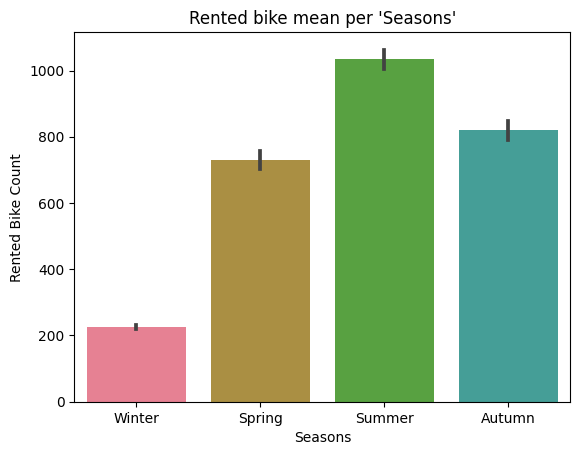

In [12]:
cat_features = data[['Seasons']]
for i in cat_features:
    ax = sns.barplot(data=data, x=i, y='Rented Bike Count')
    plt.title(f'Rented bike mean per \'{i}\'')
    plt.show()


Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas
>> Hay más uso de bicicletas en verano, y un menor uso en invierno. Esto puede también responder al mayor arriendo de bicicletas para temperaturas más cálidas.

> g) Transforme la fecha en variables numéricas. Es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)


> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

<Axes: >

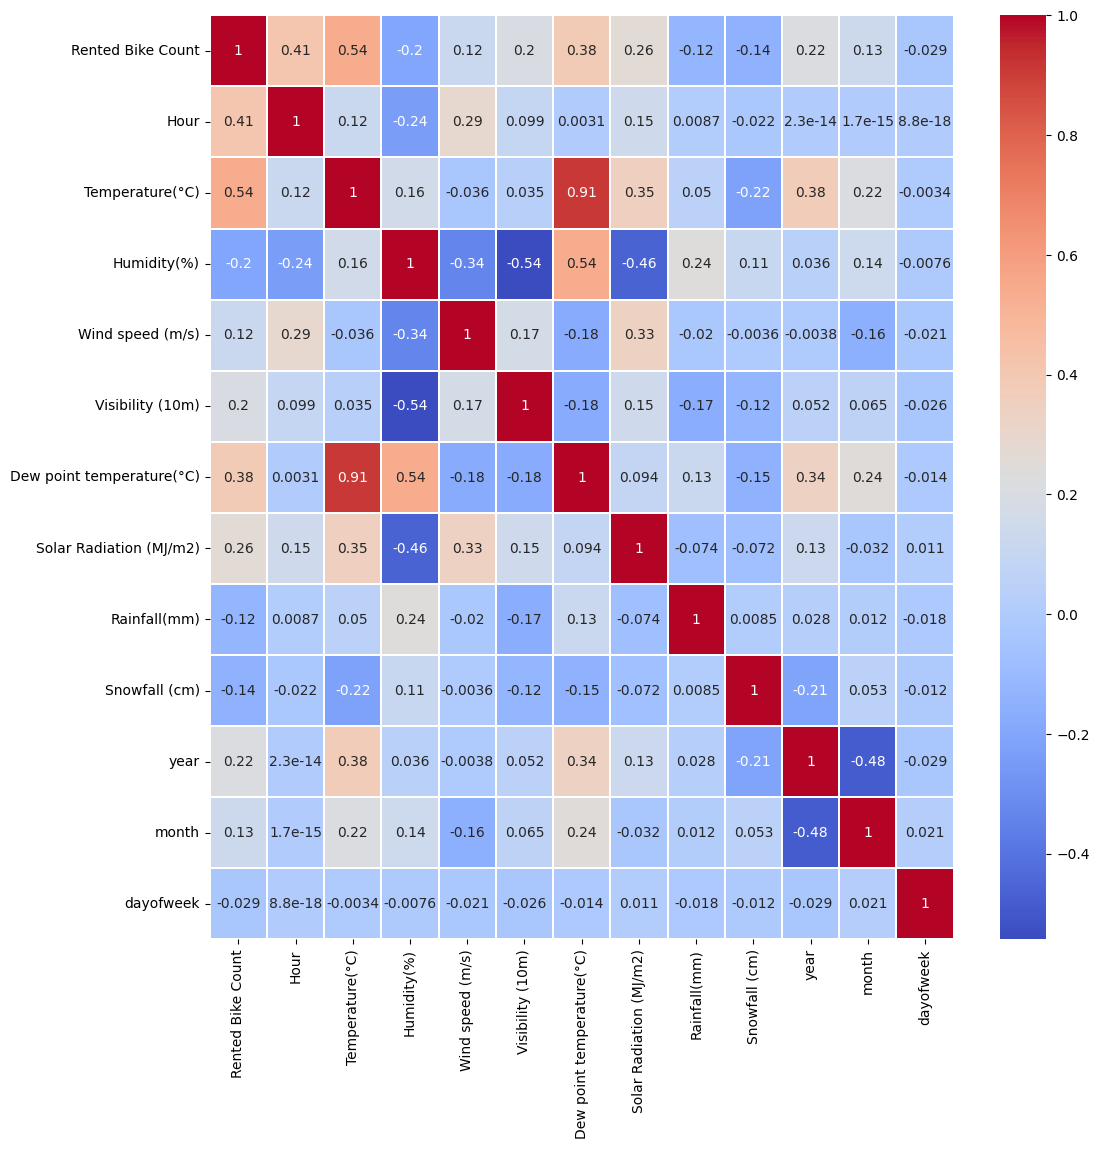

In [14]:
data_corr = data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)
>> Consideraremos una correlación alta si es mayor a 0.8. Por eso, observamos que existe una alta correlación entre `Temperature` y `Dew Point Temperature`.
>> En pos de evitar la **multicolinealidad**, como grupo hempos decidido eliminar la variable `Dew Point Temperature`, al considerar nosotros que posee menos causalidad que la variable `Temperature` (que además posee una correlación media respecto al variable target).

In [15]:
data = data.drop('Dew point temperature(°C)',axis=1)

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [16]:
X = data.drop('Rented Bike Count',axis=1)
y = data['Rented Bike Count']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.1, random_state=42,
                                                   stratify = X[['Seasons', 'Holiday']] )

> a) ¿Para qué es el parámetro stratify?
>> Se utiliza para preservar las proporciones de las distintas clases de alguna variable categorica sean las mismas en los conjuntos de entrenamiento y de testeo. Es útil cuando se tiene una variable objetivo **desbalanceada**, mejorando la calidad del modelo. Es por esta razón que se considera realizar un stratify por las variables Seasons y Holiday, pues por los gráficos anteriores se observa un desbalance en estas variables.

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.
>> Se utiliza para transformar variables categoricas a numéricas. Esta técnica asigna un número único a cada categoría. En Python, se puede aplicar utilizando el paquete `scikit-learn`, la función `LabelEncoder`.

In [19]:
# Crear un LabelEncoder para cada columna
le_seasons = preprocessing.LabelEncoder()
le_holiday = preprocessing.LabelEncoder()
le_functioning_day = preprocessing.LabelEncoder()

#print("Categorías originales:", categorias)
# Ajustar y transformar train set
X_train["Seasons"] = le_seasons.fit(X_train["Seasons"]).transform(X_train["Seasons"])
X_train["Holiday"] = le_holiday.fit(X_train["Holiday"]).transform(X_train["Holiday"])
# Dado que ya no se debe eliminar la variable 'Functioning Day', se debe preprocesar.
X_train["Functioning Day"] = le_functioning_day.fit(X_train["Functioning Day"]).transform(X_train["Functioning Day"])
#print("Etiquetas numéricas:", etiquetas_numericas)


> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [20]:
# Transformar test set usando el ajuste realizado en el train set
X_test["Seasons"] = le_seasons.transform(X_test["Seasons"])
X_test["Holiday"] = le_holiday.transform(X_test["Holiday"])
# Dado que ya no se debe eliminar la variable 'Functioning Day', se debe preprocesar.
X_test["Functioning Day"] = le_functioning_day.transform(X_test["Functioning Day"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

>> Por que puede incluir información del conjunto de testeo durante el entrenamiento, lo que puede producir _filtración de datos_ (llamado _data leakage_). Esto provoca sesgos y sobreajusta el modelo.
>>
>> Un ejemplo más claro puede ser la normalización de los datos: al normalizar el conjunto de entrenamiento incluyendo al conjunto de testeo, entonces la información contenida en este último puede influir en el primero, provocando esta _filtración de datos_.
>>
>> Es por esto que, en general, las transformaciones de los datos se deben ajustar respecto al conjunto de entrenamiento y luego aplicar sobre el conjunto de testeo.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [21]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [22]:
y_pred = reg.predict(X_test)
raw_MSE = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio de la predicción es {raw_MSE:.4f}')

El error cuadrático medio de la predicción es 184487.4870


> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

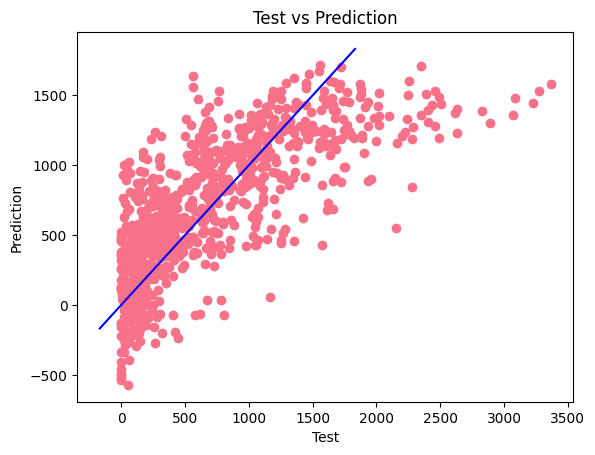

In [23]:
plt.scatter(y_test, y_pred)

# Dibujar identidad
limits = [np.min([plt.xlim()]), 
          np.max([plt.ylim()])]
plt.plot(limits, limits, 'k-', color = 'b') 

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?
>>  Dada la periodicidad de las funciones seno y coseno, al eliminar una variable esta asociaría los valores más opuestos entre sí, generando una transformación en la forma que se relacionan los datos. Por ejemplo:
>> - En un caso general, en un reloj asociaría la hora 12 con la hora 6, cuando son las horas más distantes entre sí.
>> - O bien, en el caso particular del problema, eliminar una variable relacionaría Enero con Julio que, en particular, son meses muy distintas. 
>>
>> De esta forma, utilizar dos variables implicaría asociar estos valores en un espacio 2D, distanciando valores lejanos dentro de la variable y usar una estructura ciclica.

In [24]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['dayofweek_sin'] = np.sin(2 * np.pi * X_train['dayofweek'] / 7)
X_train['dayofweek_cos'] = np.cos(2 * np.pi * X_train['dayofweek'] / 7)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['dayofweek_sin'] = np.sin(2 * np.pi * X_test['dayofweek'] / 7)
X_test['dayofweek_cos'] = np.cos(2 * np.pi * X_test['dayofweek'] / 7)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [25]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [26]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4)
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [27]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     #'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [28]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [29]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [30]:
preprocessed_MSE = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio de la predicción es {preprocessed_MSE:.4f}.')

El error cuadrático medio de la predicción es 179047.0546.


> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

In [31]:
if preprocessed_MSE < raw_MSE:
  print(f'Como el MSE para la data preprocesada ({preprocessed_MSE:.4f}) es menor al MSE para la data en bruto ({raw_MSE:.4f})\n'
  f'(es {raw_MSE/preprocessed_MSE:.4f} más grande), entonces se puede decir que los resultados SI mejoran.')
else:
  print(f'No mejora. ¡No puede ser! Noooooo...')

Como el MSE para la data preprocesada (179047.0546) es menor al MSE para la data en bruto (184487.4870)
(es 1.0304 más grande), entonces se puede decir que los resultados SI mejoran.


> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

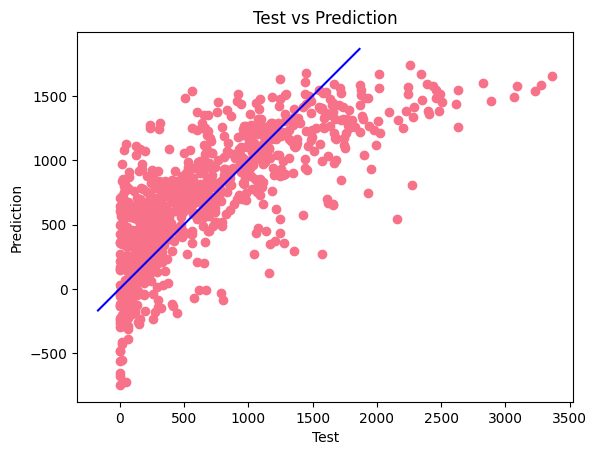

In [32]:
plt.scatter(y_test, y_pred)

# Dibujar identidad
limits = [np.min([plt.xlim()]), 
          np.max([plt.ylim()])]
plt.plot(limits, limits, 'k-', color = 'b') 

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [33]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

- ``loss``: función de perdidad a utilizar. Puede tomar distintos valores, pero los más usuales son 'squared_loss' para regresión lineal ordinaria, y 'huber' para regresión robusta.
- ``Penalty``: penalización/término de regularización a utilizar. Valores comunes que puede tomar incluye 'l2' para regularización de Ridge y 'l1' para regularización de Lasso.
- ``alpha``: constante que multiplica el término de regularización. Este parámetro controla la fuerza de la penalización; esto es, para valores altos de alpha se aumenta la magnitud de penalización, y viceversa para valores bajos.
- ``l1_ration``: coeficiente que permite realizar una ponderación entre las penalizaciones 'l1' y 'l2' en la regresión elástica. Un valor de 1 corresponde a una regresión de Lasso, mientras que un valor de 0 corresponde a una regresión de Ridge.
- ``fit_intercept``: si el intercepto debe ser estimado o no.
- ``max_iter``: máximo número de epochs sobre los datos de entrenamiento.
- ``tol``: criterio de parada del algoritmo.
- ``shuffle``: si los datos debe ser reordenada luego de cada epoch.
- ``verbose``: nivel de verbosidad.
- ``epsilon``: epsilon-insensitive loss functions; only if loss is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
- ``random_state``: Used for shuffling the data, when shuffle is set to True. Para generar output reproducibles
- ``learning rate``: learning rate schedule. Puede tomar valores 'constant', 'optimal', 'invscaling' y 'adaptive'.
- ``eta0``: initial learning rate
- ``power_t``: exponente para inverse scaling learning rate
- ``early_stopping``: para terminar el entrenamiento cuando el score de validación no mejore
- ``validation_fraction``: proporción de data de entrenamiento para dejar al lado como validación para early stopping
- ``n_iter_no_change``: número de iteraciones sin mejora antes de detener
- ``warm_start``: para reusar la solucion anterior para la inicialización
- ``average``: When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute.

Respuesta2:
max_iter: el número máximo de iteraciones permitidas para la optimización. Si la optimización no converge dentro de este número de iteraciones, se generará una advertencia y se devolverá el modelo actual.
tol: la tolerancia para la detección de convergencia. Si la diferencia entre las pérdidas en dos iteraciones consecutivas es menor que esta tolerancia, se considera que el modelo ha convergido.
learning_rate: la tasa de aprendizaje para el SGD. Los valores comunes incluyen "constant", "invscaling" y "adaptive".
eta0: la tasa de aprendizaje inicial para el SGD. Este valor se utiliza en combinación con la tasa de aprendizaje especificada por learning_rate para ajustar la tasa de aprendizaje durante la optimización.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

El parámetro alpha es un hiperparámetro que controla la fuerza de la regularización en los modelos de regresión lineal utilizando la técnica de regularización Ridge. A medida que aumenta el valor de alpha, la importancia de las características disminuye y se reduce el riesgo de sobreajuste. El valor de alpha puede variar desde 0 (sin regularización) hasta infinito (todas las ponderaciones son cero).

existen varias opciones para actualizar el valor de alpha durante el entrenamiento. Estas opciones son:

- ``'constant'``: el valor de alpha se mantiene constante durante todo el entrenamiento.
- ``'optimal'``: el valor de alpha se ajusta automáticamente en función de la tasa de aprendizaje y el número de muestras de entrenamiento.
- ``'invscaling'``: el valor de alpha se actualiza con el tiempo según la siguiente fórmula: ``alpha = alpha / pow(t, power_t)``, donde ``t`` es el número de iteraciones y ``power_t`` es un parámetro.
- ``'adaptive'``: el valor de alpha se ajusta para cada muestra de entrenamiento en función de si la predicción es correcta o no.

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

El early stopping es una técnica utilizada en el entrenamiento de modelos de aprendizaje automático para evitar el sobreajuste o overfitting. Consiste en monitorear el rendimiento del modelo en un conjunto de validación (distinto del conjunto de entrenamiento) y detener el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar.

Al detener el entrenamiento tempranamente, se evita que el modelo se ajuste demasiado a los datos de entrenamiento y se generalice mal a nuevos datos. Esto puede mejorar la capacidad del modelo para hacer predicciones precisas en datos no vistos y aumentar su capacidad de generalización.

In [34]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   verbose = 0,
                   #early_stopping = True, 
                   #n_iter_no_change = 10,
                   #max_iter = 100
                  )

In [35]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# Entrenar el modelo usando Early Stopping. Se utiliza Partial Fit para obtener los errores en cada epoch
n_epochs = 100
best_val_error = float('inf')
patience = 10  # Detener training si el error de validación no mejora luego de 10 epoch
epoch_since_best = 0

for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # Guardar el error de training y validación luego de cada epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # Chequear si el error de validación mejoró
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"El entrenamiento se detiene luego de {epoch+1} epochs. Esto pues han pasado el error de validación no ha mejorado luego de {patience} epochs.")
            break 

El entrenamiento se detiene luego de 57 epochs. Esto pues han pasado el error de validación no ha mejorado luego de 10 epochs.


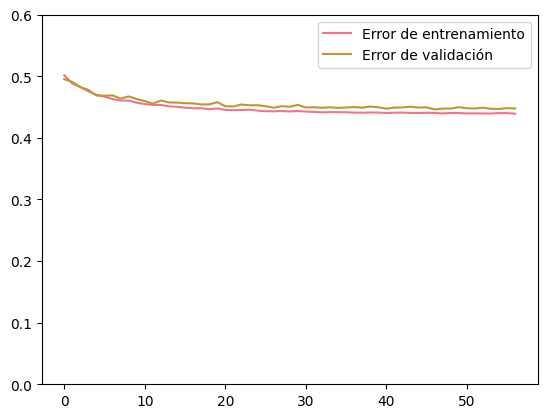

In [36]:
plt.plot(tr_errors, label='Error de entrenamiento')
plt.plot(val_errors, label='Error de validación')

plt.ylim(0,0.6)
plt.legend()
plt.show()

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?
>> - Se observa que la tendencia de los errores de ambos conjuntos disminuye a medida que aumentan los epochs, lo cual indica que el modelo mejoró continuamente su rendimiento.
>> - La brecha entre estas los curvas nos indica si el modelo está sufriendo de sobreajuste o no. En este caso, se aprecia la brecha se mantiene constante.
>> - Como el error de entrenamiento y el error de testeo están cercanos, se considera que hay **underfitting**.

> f) ¿Cuántas _epochs_ duró su entrenamiento?

In [37]:
print(f'El entrenamiento duró {epoch+1} epochs.')

El entrenamiento duró 57 epochs.


> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [38]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [39]:
SGD_MSE = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio de la predicción es {SGD_MSE:.4f}.')

El error cuadrático medio de la predicción es 179754.0608.


> i) ¿Mejoran los resultados con respecto al modelo anterior?

In [40]:
if preprocessed_MSE > SGD_MSE:
  print(f'Como el MSE para el modelo SGD ({SGD_MSE:.4f}) es menor al MSE para el modelo lineal preprocesado ({preprocessed_MSE:.4f})\n'
  f'(es {preprocessed_MSE/SGD_MSE:.4f} más grande), entonces los resultados SI mejoran.')
else:
  print(f'Como el MSE para el modelo lineal preprocesado ({preprocessed_MSE:.4f}) es menor al MSE para el modelo SGD ({SGD_MSE:.4f})\n'
  f'(es {SGD_MSE/preprocessed_MSE:.4f} más grande), entonces los resultados NO mejoran.')

Como el MSE para el modelo lineal preprocesado (179047.0546) es menor al MSE para el modelo SGD (179754.0608)
(es 1.0039 más grande), entonces los resultados NO mejoran.


>> Que el modelo no mejore puede deberse, en este caso, a la falta de regularización o hyper tuning, como ya se detalló anteriormente.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

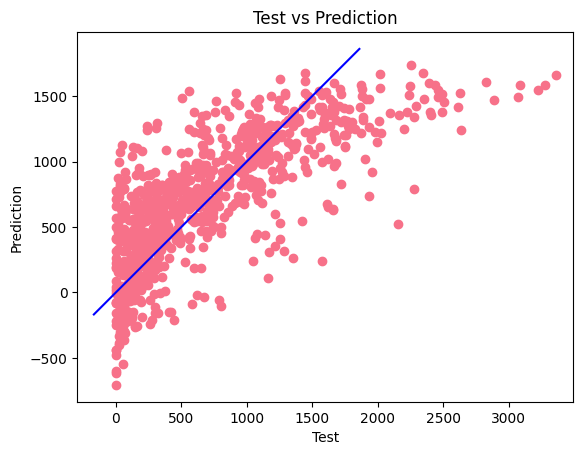

In [41]:
plt.scatter(y_test, y_pred)

# Dibujar identidad
limits = [np.min([plt.xlim()]), 
          np.max([plt.ylim()])]
plt.plot(limits, limits, 'k-', color = 'b') 

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

Los hiperparámetros de un modelo son parámetros que deben ser especificados por el usuario antes de entrenar el modelo y que no se ajustan durante el proceso de entrenamiento. La selección adecuada de los hiperparámetros es esencial para obtener un buen rendimiento del modelo. 

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

 La motivación para agregar una penalización al modelo es evitar el sobreajuste y mejorar la capacidad del modelo para generalizar a datos nuevos y no vistos. La penalización restringe la complejidad del modelo, reduciendo la variabilidad y aumentando el sesgo.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

La penalización mediante regularización Ridge se compone de un término que se agrega a la función de coste del modelo y que es proporcional al cuadrado de los coeficientes del modelo. Esto penaliza los coeficientes grandes y promueve coeficientes más pequeños, lo que ayuda a evitar el sobreajuste.


> d) ¿Cómo funciona la regularización Lasso?

La regularización Lasso también agrega un término a la función de coste del modelo, pero en lugar de utilizar el cuadrado de los coeficientes, utiliza el valor absoluto de los coeficientes. Esto tiene el efecto de establecer algunos coeficientes a cero, lo que puede resultar en modelos más simples y fáciles de interpretar.

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

La ventaja de la regularización Ridge es que puede manejar múltiples características correlacionadas sin eliminar ninguna de ellas, mientras que Lasso tiende a establecer algunos coeficientes a cero, lo que puede ser beneficioso para la selección de características. La desventaja de Ridge es que no es capaz de eliminar características irrelevantes del modelo, lo que puede reducir la interpretabilidad y eficiencia del modelo. Por otro lado, la desventaja de Lasso es que puede ser demasiado agresiva al establecer coeficientes a cero, eliminando algunas características relevantes en el proceso.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [42]:
k = 5
cv_folds = KFold(n_splits=k, shuffle=True)

In [43]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=False,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.5                   
                   )

In [44]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [45]:
hypereg.fit(X_train, y_train.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100, power_t=0.5, shuffle=False),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [46]:
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.018520,0.002121,0.003249,0.001553,0.0001,0.001,constant,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",-4.396368e-01,-4.303486e-01,-4.751775e-01,-4.531174e-01,-4.448798e-01,-4.486320e-01,1.519247e-02,1
13,0.022524,0.002494,0.002718,0.001525,0.0001,0.001,constant,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",-4.399743e-01,-4.302807e-01,-4.752594e-01,-4.534549e-01,-4.442321e-01,-4.486403e-01,1.525363e-02,2
30,0.012672,0.002027,0.002771,0.002203,0.001,0.001,constant,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-4.399171e-01,-4.305483e-01,-4.752027e-01,-4.540902e-01,-4.452489e-01,-4.490014e-01,1.516266e-02,3
31,0.020976,0.002648,0.001901,0.000466,0.001,0.001,constant,l1,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-4.408790e-01,-4.317107e-01,-4.763247e-01,-4.550420e-01,-4.465945e-01,-4.501102e-01,1.515017e-02,4
48,0.012355,0.001407,0.002247,0.000685,0.01,0.001,constant,l2,"{'alpha': 0.01, 'eta0': 0.001, 'learning_rate'...",-4.448200e-01,-4.344780e-01,-4.776406e-01,-4.649903e-01,-4.498444e-01,-4.543546e-01,1.524262e-02,5
4,0.012074,0.000682,0.002080,0.000574,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.466955e-01,-4.408448e-01,-4.817358e-01,-4.684813e-01,-4.538281e-01,-4.583171e-01,1.491470e-02,6
5,0.016051,0.002628,0.002361,0.001492,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.466931e-01,-4.408353e-01,-4.817034e-01,-4.686530e-01,-4.538718e-01,-4.583513e-01,1.492807e-02,7
22,0.012463,0.000675,0.001444,0.000294,0.001,0.1,invscaling,l2,"{'alpha': 0.001, 'eta0': 0.1, 'learning_rate':...",-4.470280e-01,-4.410605e-01,-4.818501e-01,-4.691783e-01,-4.541500e-01,-4.586534e-01,1.492516e-02,8
23,0.016397,0.001326,0.002442,0.000667,0.001,0.1,invscaling,l1,"{'alpha': 0.001, 'eta0': 0.1, 'learning_rate':...",-4.471118e-01,-4.410718e-01,-4.816232e-01,-4.699127e-01,-4.548035e-01,-4.589046e-01,1.490778e-02,9
27,0.047329,0.004746,0.001343,0.000258,0.001,0.01,optimal,l1,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate'...",-4.454128e-01,-4.407328e-01,-4.965732e-01,-4.616142e-01,-4.660177e-01,-4.620701e-01,1.969265e-02,10


In [47]:
print(hypereg.best_params_)

{'alpha': 0.0001, 'eta0': 0.001, 'learning_rate': 'constant', 'penalty': 'l2'}


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [48]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [49]:
reg_MSE = mean_squared_error(y_test, y_pred)
print(f'El error cuadrático medio de la predicción es {reg_MSE:.4f}.')

El error cuadrático medio de la predicción es 179954.3227.


> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

In [50]:
if SGD_MSE > reg_MSE:
  print(f'Como el MSE para modelo regularizado ({reg_MSE:.4f}) es menor al MSE para el modelo SGD ({SGD_MSE:.4f})\n'
  f'(es {SGD_MSE/reg_MSE:.4f} más grande), entonces los resultados SI mejoran.')
else:
  print(f'Como el MSE para el modelo SGD ({SGD_MSE:.4f}) es menor al MSE para el modelo regularizado ({reg_MSE:.4f})\n'
  f'(es {reg_MSE/SGD_MSE:.4f} más grande), entonces los resultados NO mejoran.')

list_MSE = sorted([('En Bruto', raw_MSE), ('Preprocesado', preprocessed_MSE), ('SGD', SGD_MSE), ('Regularizado', reg_MSE)],
                  key = lambda x : x[1])

print('\n Mejores modelos (según su MSE)\n')
for i in range(len(list_MSE)):
  print(f'{i+1}. {list_MSE[i][0]: >12}: {list_MSE[i][1]:.4f}.')

Como el MSE para el modelo SGD (179754.0608) es menor al MSE para el modelo regularizado (179954.3227)
(es 1.0011 más grande), entonces los resultados NO mejoran.

 Mejores modelos (según su MSE)

1. Preprocesado: 179047.0546.
2.          SGD: 179754.0608.
3. Regularizado: 179954.3227.
4.     En Bruto: 184487.4870.


> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

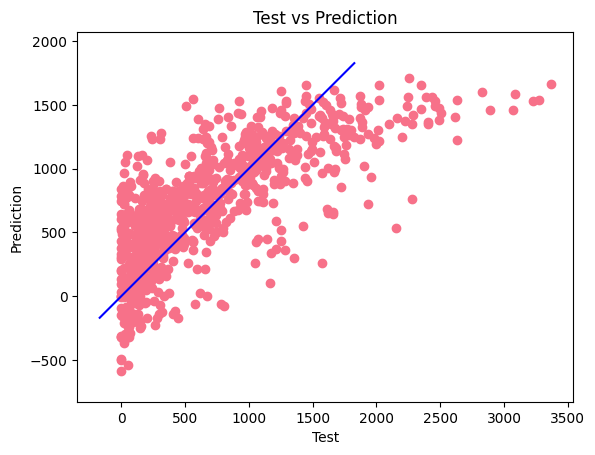

In [51]:
plt.scatter(y_test, y_pred)

# Dibujar identidad
limits = [np.min([plt.xlim()]), 
          np.max([plt.ylim()])]
plt.plot(limits, limits, 'k-', color = 'b') 

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

> - El preprocesamiento de los datos permite mejorar los resultados del modelo, esto es, pues permite indicar al modelo el comportamiento general de las variables. A partir del modelo lineal preprocesado se observó la mejora sustancial respecto al modelo lineal en bruto, por lo que se muestra la importancia de realizar transformaciones a los datos ants del modelamiento. Por ejemplo, al identificar variables ciclicas y realizar la transformación, permite al modelo asociar correctamente las horas con aquellas más cercanas.
> - El modelo de regresión lineal puede estar limitado por los tipos de relacion entre las variables explicativas. En particular, algunas variables pueden tener asociaciones no lineales, por lo que se deba requerir de transformaciones. Para cumplir con las hipótesis del modelo lineal, se evitó la multicolinealidad estudiando la eliminación de la columna `Dew point temperature`. Considerar que aún falta estudiar la heterocedasticidad de esta.
> - El modelo de SGD es competitivo y eficiente. Esto se pudo apreciar por la rapidez del modelo y el buen rendimiento respecto a las métricas, haciendo una alternativa viable al modelo de regresión lineal.
> - La regularización y el hyper tuning permiten, en general, disminuir el MSE del modelo evitando el overfittibng. En este caso particular, se observa que a partir del gráfico de comparacion entre el error de entrenamiento y el error de testeo hay un problema de **underfitting**, entonces en particular no se requiere de una regularización, por lo que las métricas no mejoran utilizando este método.

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [ ]:
!kaggle datasets download -d uciml/mushroom-classification

mushroom-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
replace mushrooms.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [52]:
df = pd.read_csv('mushrooms.csv')

In [53]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.
>> La columna `veil_type` se compone de solo un elemento, como se puede apreciar en el siguiente gráfico y en la tabla anterior, por lo que no aporta información adicional para la clasificación.

<Axes: xlabel='veil-type', ylabel='count'>

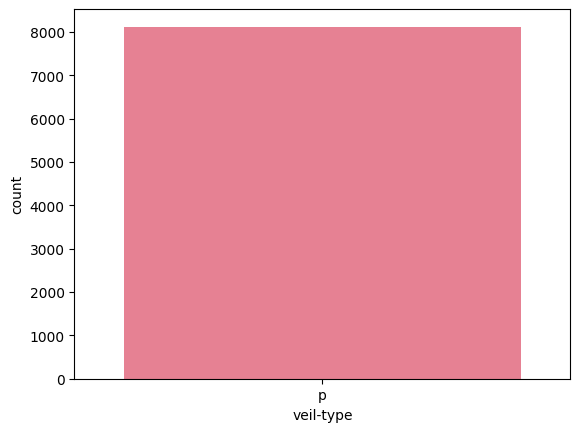

In [55]:
sns.countplot(x="veil-type", data=df)

In [56]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

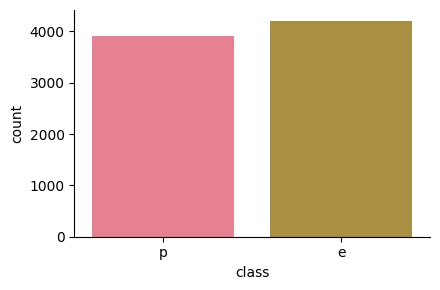

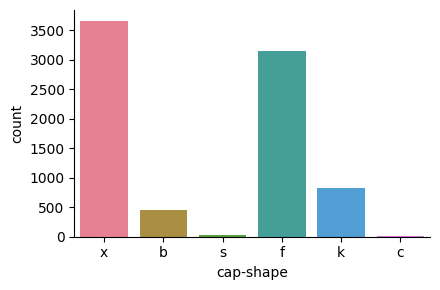

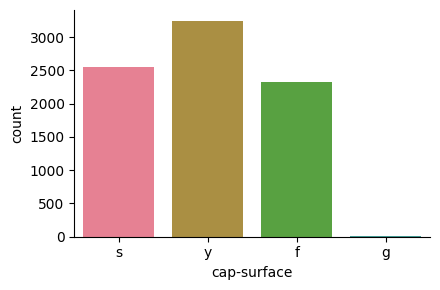

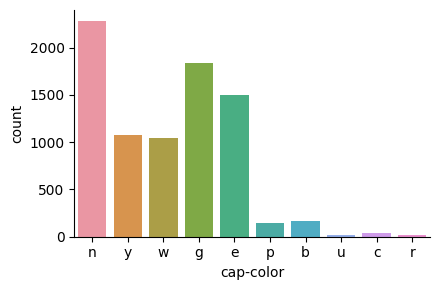

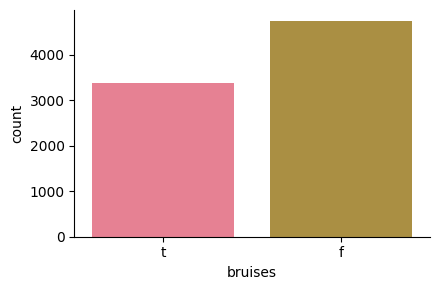

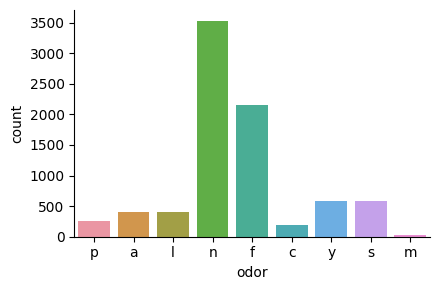

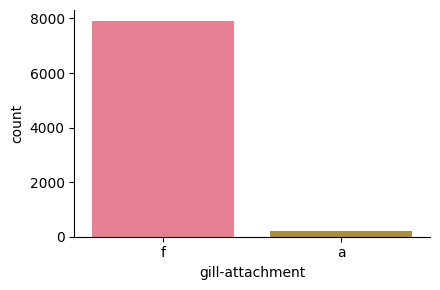

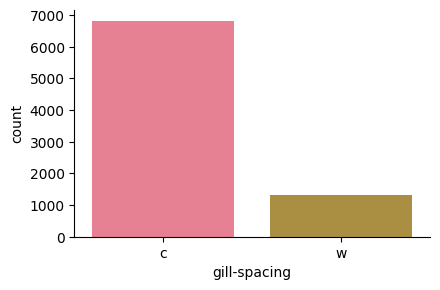

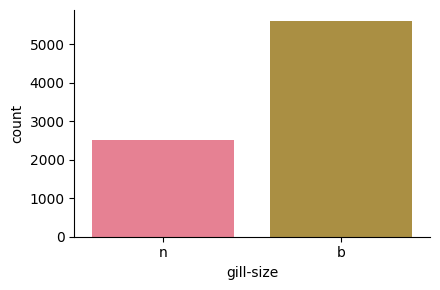

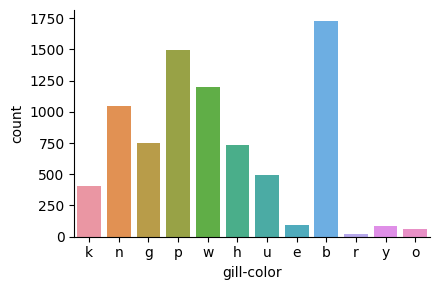

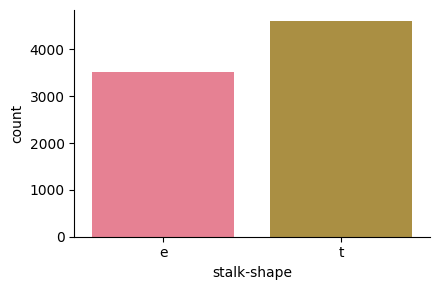

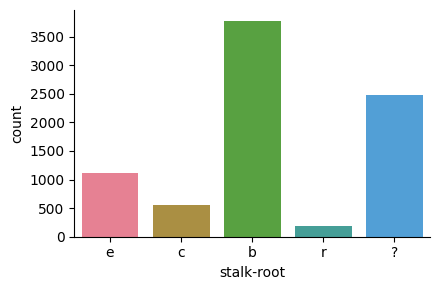

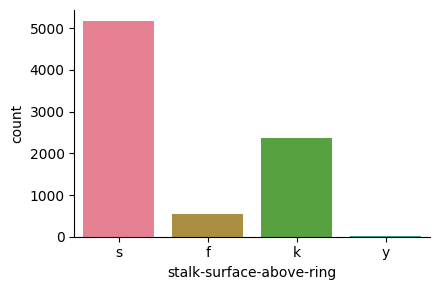

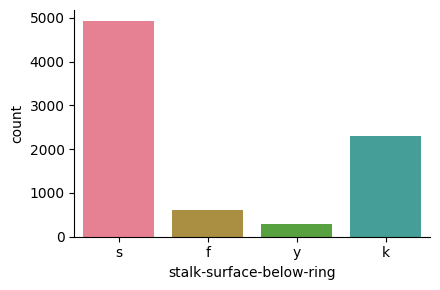

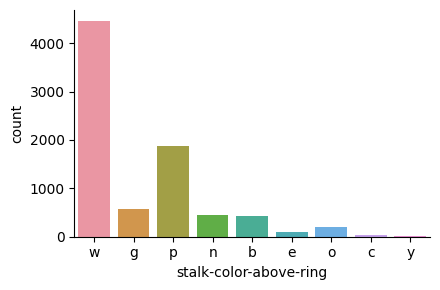

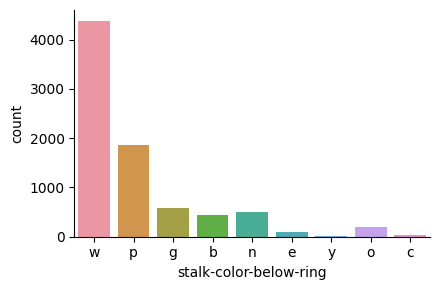

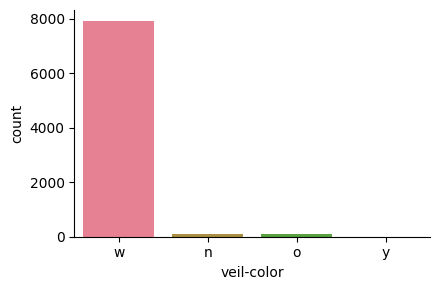

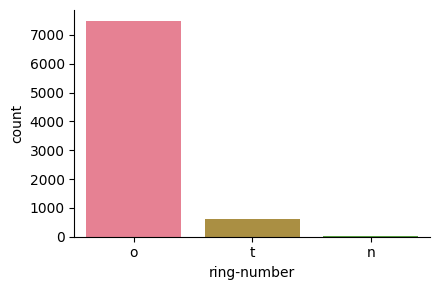

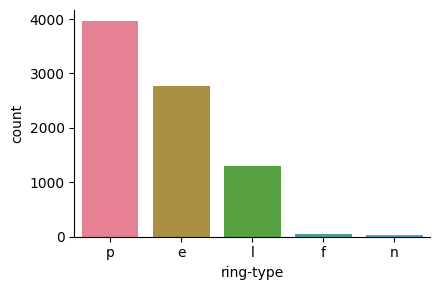

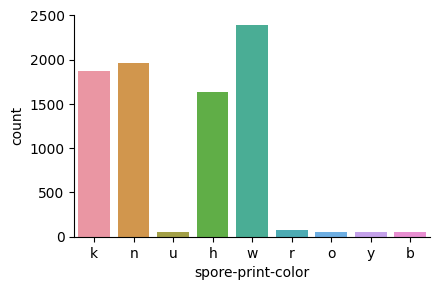

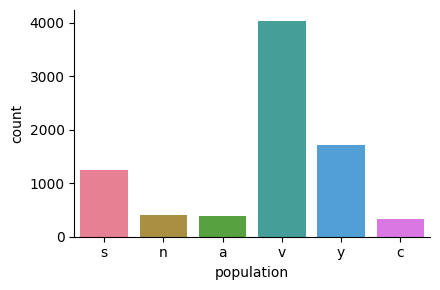

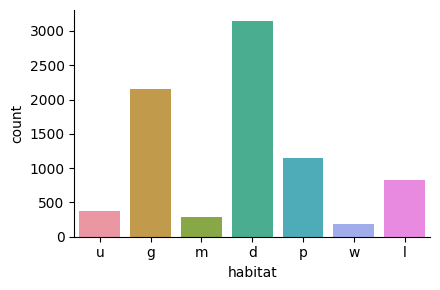

In [57]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

> e) Separe los subconjuntos en _X_ e _y_

In [58]:
# Cargar data y separarla en conjuntos de train/test
# CAMBIAR POR TRAIN TEST SPLIT, AÑADIR STRATIFY CON Y Y AGREGAR SHUFFLE
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# Crear una lista para almacenar las columnas a eliminar
drop_cols = []

# Iterar sobre columnas y chequear por variables binarias
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # Convertir variables binarias a 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # Si son variables categoricas (más de dos categorías), definir dummies para cada una de ellas
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # Añadir columna a la lista de columnas a eliminar
        drop_cols.append(col)

# Eliminar las columnas originales de las variables categoricas
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# Verificar que los conjuntos train/test tengan la misma cantidad de columnas
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


In [59]:
# Separar los conjuntos en X e y
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [60]:
n_features = X_train.shape[1]

dfs_train = []
dfs_test = []

# Aplicar PCA para cada k dado
for k in [1,10,50]:
    pca = PCA(n_components=n_features -k) #{1,10,50}
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    dfs_train.append(X_train_pca.copy())
    dfs_test.append(X_test_pca.copy())
    
    print('k: ', k)
    print('Dimensión X_train: ', X_train_pca.shape)
    print('Dimensión X_test: ', X_test_pca.shape)

k:  1
Dimensión X_train:  (5687, 110)
Dimensión X_test:  (2437, 110)
k:  10
Dimensión X_train:  (5687, 101)
Dimensión X_test:  (2437, 101)
k:  50
Dimensión X_train:  (5687, 61)
Dimensión X_test:  (2437, 61)


### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [61]:
mi = mutual_info_classif(X_train, y_train)

In [62]:
max_score = 0.0
for i, score in enumerate(mi):
    if score > max_score:
        max_score = score
        max_i = i
    print(f"Feature {i}: {score:.3f}")
    
print(f'Max value Feature {max_i}: {max_score:.3f}')

Feature 0: 0.128
Feature 1: 0.016
Feature 2: 0.076
Feature 3: 0.156
Feature 4: 0.013
Feature 5: 0.023
Feature 6: 0.011
Feature 7: 0.013
Feature 8: 0.000
Feature 9: 0.003
Feature 10: 0.001
Feature 11: 0.023
Feature 12: 0.000
Feature 13: 0.000
Feature 14: 0.008
Feature 15: 0.010
Feature 16: 0.003
Feature 17: 0.000
Feature 18: 0.000
Feature 19: 0.010
Feature 20: 0.013
Feature 21: 0.005
Feature 22: 0.006
Feature 23: 0.000
Feature 24: 0.001
Feature 25: 0.028
Feature 26: 0.016
Feature 27: 0.244
Feature 28: 0.042
Feature 29: 0.005
Feature 30: 0.363
Feature 31: 0.032
Feature 32: 0.071
Feature 33: 0.057
Feature 34: 0.189
Feature 35: 0.000
Feature 36: 0.005
Feature 37: 0.016
Feature 38: 0.016
Feature 39: 0.048
Feature 40: 0.001
Feature 41: 0.016
Feature 42: 0.000
Feature 43: 0.022
Feature 44: 0.032
Feature 45: 0.000
Feature 46: 0.046
Feature 47: 0.003
Feature 48: 0.040
Feature 49: 0.026
Feature 50: 0.010
Feature 51: 0.000
Feature 52: 0.192
Feature 53: 0.126
Feature 54: 0.003
Feature 55: 0.007
Fe

In [63]:

# set k to the number of features you want to exclude
k = 1, 10, 50

# n = n -k caracterisitcas con score más alto

for i in k:
    # compute the number of features to select
    n = len(mi) - i
    
    # get the indices of the features sorted by mutual information score
    sorted_indices = np.argsort(mi)
    
    # select the top n features
    selected_indices = sorted_indices[-n:]
    selected_x_train = X_train.iloc[:, selected_indices]
    selected_x_test = X_test.iloc[:, selected_indices]
    dfs_train.append(selected_x_train.copy())
    dfs_test.append(selected_x_test.copy())
    

In [64]:
title = ["PCA-1", "PCA-10" , "PCA-50", "MI-1", "MI-10" , "MI-50"]

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

In [65]:
# Modelos obtenidos en el punto anterior
for i in dfs_train:
    print(i.shape)

(5687, 110)
(5687, 101)
(5687, 61)
(5687, 110)
(5687, 101)
(5687, 61)


### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

>> - **Distribución Bernoulli**: esta distribución puede utilizarse para características binarias, como la presencia o ausencia de una característica específica en el hongo.
>> - **Distribución Multinomial**: esta distribución puede utilizarse para características categóricas con más de dos categorías, como el color del hongo.
>> - **Distribución Poisson**: esta distribución puede utilizarse para contar la frecuencia de características, como el número de anillos en el tallo del hongo.
>> - **Distribución Exponencial**: esta distribución puede utilizarse para modelar características que toman valores positivos continuos, como el tamaño del sombrero del hongo.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [66]:
y_pred = []

for i in range(len(dfs_train)):
    clf = GaussianNB()
    clf.fit(dfs_train[i], y_train)
    y_pred.append(clf.predict(dfs_test[i]))

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [67]:
#labels=['edible', 'poisonous']
for i in range(len(y_pred)):
    print(title[i])
    print(classification_report(y_test, y_pred[i], labels=[0,1]))

PCA-1
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      1303
           1       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA-10
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      1303
           1       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA-50
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1303
           1       0.96      0.87      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.92      0.92      2437
weighted avg       0.92      0.92      0.92      2437


> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.
>> Se utiliza la representación MI-10, pues posee en general las mejores metricas.

> f) Muestre los errores tipo 1 y tipo 2.

In [68]:
#Representacion elegida
X_train = dfs_train[4]
X_test = dfs_test[4]
y_pred = y_pred[4]

In [69]:
len(y_pred[y_pred==1])
### ¿Cuál es comestible y venenoso? 0 o 1

1127

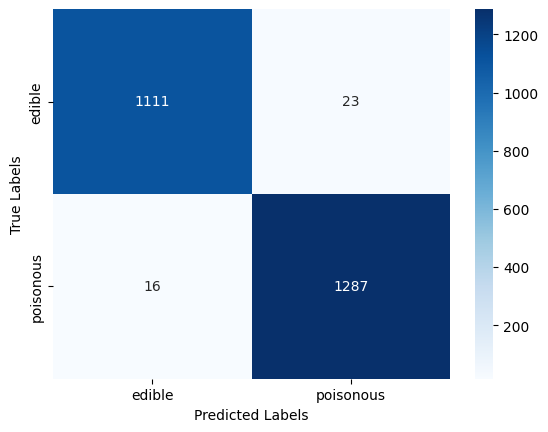

In [70]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])

# add axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

El modelo de análisis discriminante lineal (LDA) asume que las distribuciones condicionales de cada clase son Gaussianas y que tienen la misma matriz de covarianza. En otras palabras, asume que las muestras de ambas clases se distribuyen según una distribución normal multivariada y que tienen la misma forma, tamaño y orientación.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

El modelo LDA asume que las matrices de covarianza de las distribuciones condicionales son iguales para ambas clases. Esto se conoce como la hipótesis de igualdad de covarianzas. En otras palabras, asume que las matrices de covarianza de las muestras de cada clase son idénticas y que no hay una estructura de covarianza distinta para cada clase. Bajo esta suposición, se puede utilizar una única matriz de covarianza para ambos grupos durante la transformación de características.

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1. Entrene el LDA con n_components = n_features - k, donde k={1,10,50}, es decir, entrene 3 modelos distintos.

In [71]:
# n_components cannot be larger than min(n_features, n_classes - 1).
y_pred_LDA = []
for k in [1,10,50]:
    clf = LinearDiscriminantAnalysis(n_components=1)
    clf.fit(X_train, y_train)
    y_pred_LDA.append(clf.predict(X_test))

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [72]:
title = ["LDA-1", "LDA-10", "LDA-5"]

In [73]:
for i in range(len(y_pred_LDA)):
    print(title[i])
    print(classification_report(y_test, y_pred_LDA[i],  labels=[0,1]))

LDA-1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1303
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437

LDA-10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1303
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437

LDA-5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1303
           1       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



> e) Muestre los errores tipo 1 y tipo 2.

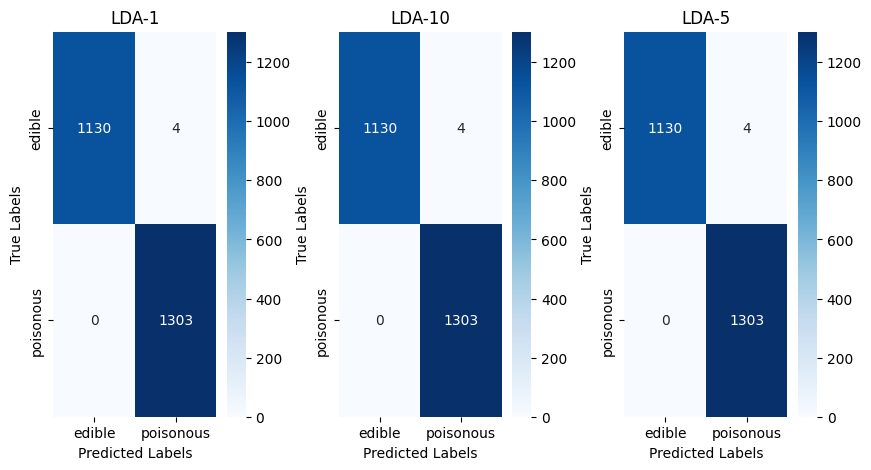

In [74]:
fig, axs = plt.subplots(ncols=len(y_pred_LDA), figsize=(10, 5))


for i in range(len(y_pred_LDA)):
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_LDA[i])  # replace y_true and y_pred with your actual true and predicted labels
    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]
    # add axis labels
    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'], ax= axs[i])
    axs[i].set_title(title[i])
    axs[i].set_xlabel('Predicted Labels')
    axs[i].set_ylabel('True Labels')

fig.subplots_adjust(wspace=0.4)



### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

La estimación de máxima verosimilitud de coeficientes en la regresión logística consiste en encontrar los valores de los coeficientes de la función lineal que maximizan la probabilidad de obtener los valores observados de la variable objetivo, dados los valores observados de las características. Esta estimación se basa en la función de verosimilitud, que mide la probabilidad de obtener los datos observados dados los valores de los coeficientes de la función lineal. En general, esta estimación se realiza mediante técnicas numéricas de optimización, como el método de Newton-Raphson.

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

La regresión logística asume que la relación entre las características y la variable objetivo es lineal en la escala logit. En otras palabras, la probabilidad de que una muestra pertenezca a una clase determinada se puede expresar como una función lineal de las características, después de aplicar la función logit para transformar la probabilidad a la escala real. Además, el modelo asume que las características son independientes entre sí, lo que se conoce como la asunción de independencia condicional.

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

Para evitar el sobreajuste de la regresión logística, se pueden aplicar varias técnicas, como la regularización L1 o L2, que añaden una penalización a los coeficientes de la función lineal para evitar que tomen valores demasiado grandes. Otra técnica es utilizar validación cruzada para evaluar el rendimiento del modelo en conjuntos de datos de prueba y ajustar los parámetros del modelo en consecuencia. Además, se pueden utilizar técnicas de selección de características para elegir las características más relevantes para la clasificación y eliminar las características irrelevantes o redundantes.

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [75]:
#Agregar variación de hiperparámetros
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [76]:
#labels=['edible', 'poisonous']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1303
           1       0.98      0.96      0.97      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.98      0.98      2437
weighted avg       0.98      0.98      0.98      2437



> f) Muestre los errores tipo 1 y tipo 2.

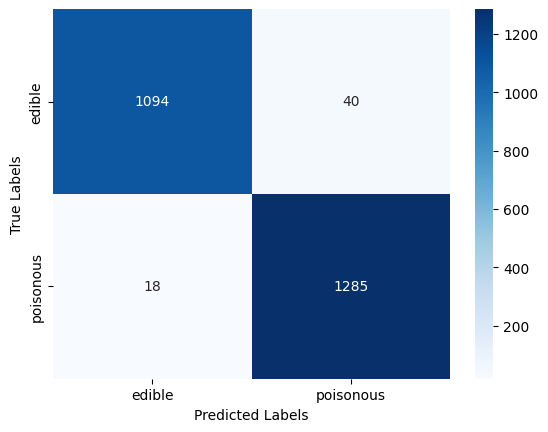

In [77]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])

# add axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_, con parámetro de regularización _l2_ y coeficiente fijo 1.0:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [78]:
#{'linear', 'poly', 'rbf'}
y_pred = []
title = []
for i in ['linear', 'poly', 'rbf']:
    for j in [0.1, 0.2]:
        title.append(i + '-' + str(j))
        clf = NuSVC(kernel=i, nu=j, coef0 = 1.0)
        clf.fit(X_train, y_train)
        y_pred.append(clf.predict(X_test))

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [79]:
for i in range(len(y_pred)):
    print(title[i])
    print(classification_report(y_test, y_pred[i], labels=[0,1]))

linear-0.1
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1303
           1       1.00      0.97      0.98      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.98      0.99      2437
weighted avg       0.99      0.99      0.99      2437

linear-0.2
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1303
           1       0.98      0.96      0.97      1134

    accuracy                           0.97      2437
   macro avg       0.97      0.97      0.97      2437
weighted avg       0.97      0.97      0.97      2437

poly-0.1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1303
           1       1.00      0.98      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99

> e) Muestre los errores tipo 1 y tipo 2.

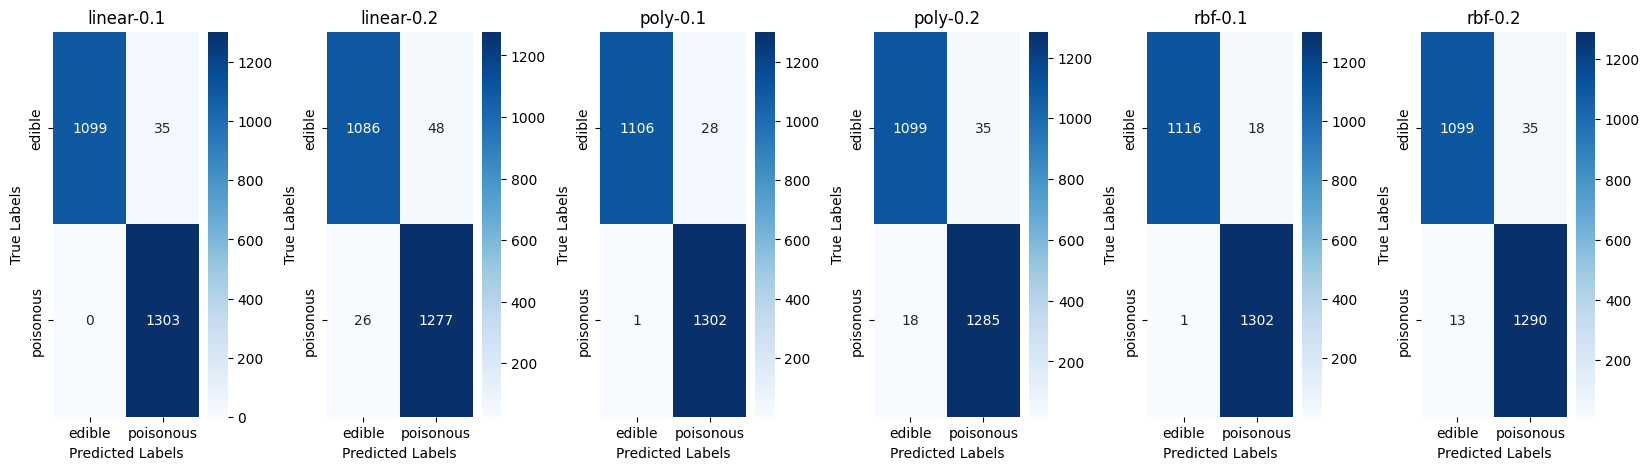

In [80]:
fig, axs = plt.subplots(ncols=len(y_pred), figsize=(20, 5))


for i in range(len(y_pred)):
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred[i])  # replace y_true and y_pred with your actual true and predicted labels
    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]
    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'], ax= axs[i])
    axs[i].set_title(title[i])
    # add axis labels
    axs[i].set_xlabel('Predicted Labels')
    axs[i].set_ylabel('True Labels')

fig.subplots_adjust(wspace=0.5)

## 2.3 Conclusiones:

- importancia de reducir el error tipo I (predecir que es comestible cuando era poisonous)